In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [ ]:
2e-8*1.5e-8*3.18e15+1

In [ ]:
9.585e-5*5.86e-6*3600*0.13509/(9*96485.3*1.58*0.065*8.52e-5*(2e-8*1.5e-8*3.18e15+1))

In [18]:
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped", "particle mechanics": "swelling only", "SEI": "constant"})
param = pybamm.ParameterValues("OKane2023")
param.update({"Ambient temperature [K]": 283.15})
param.update({"Initial temperature [K]": 283.15})
param.update({"Initial inner SEI thickness [m]": 1.8398E-8})
param.update({"Initial outer SEI thickness [m]": 1.8398E-8})
param.update({"Negative electrode porosity": 0.22239})
exp = pybamm.Experiment(
    ["Discharge at 1C until 2.5 V"]
)

pts100 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 20,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

pts60 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 60,  # negative particle
    "r_p": 20,  # positive particle
}

sim60 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts60)
solution60 = sim60.solve(calc_esoh=False)

pts50 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 50,  # negative particle
    "r_p": 20,  # positive particle
}

sim50 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts50)
solution50 = sim50.solve(calc_esoh=False)

pts40 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 40,  # negative particle
    "r_p": 20,  # positive particle
}

sim40 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts40)
solution40 = sim40.solve(calc_esoh=False)

pts30 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 20,  # positive particle
}

sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts30)
solution30 = sim30.solve(calc_esoh=False)

At t = 0.00364808, , mxstep steps taken before reaching tout.
At t = 0.00364808, , mxstep steps taken before reaching tout.
At t = 0.0037677, , mxstep steps taken before reaching tout.
At t = 0.0037677, , mxstep steps taken before reaching tout.
At t = 0.00382996, , mxstep steps taken before reaching tout.
At t = 0.00382996, , mxstep steps taken before reaching tout.
At t = 0.00392027, , mxstep steps taken before reaching tout.
At t = 0.00392027, , mxstep steps taken before reaching tout.
At t = 0.0040678 and h = 2.153e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0040678, , mxstep steps taken before reaching tout.


In [19]:
t100 = solution100["Time [s]"].entries
t60 = solution60["Time [s]"].entries
t50 = solution50["Time [s]"].entries
t40 = solution40["Time [s]"].entries
t30 = solution30["Time [s]"].entries
T100 = solution100["Volume-averaged cell temperature [K]"].entries
T60 = solution60["Volume-averaged cell temperature [K]"].entries
T50 = solution50["Volume-averaged cell temperature [K]"].entries
T40 = solution40["Volume-averaged cell temperature [K]"].entries
T30 = solution30["Volume-averaged cell temperature [K]"].entries
print(f"With 100 points, average temperature over cycle is {np.average(T100)-273.15} degrees.")
print(f"With 60 points, average temperature over cycle is {np.average(T60)-273.15} degrees.")
print(f"With 50 points, average temperature over cycle is {np.average(T50)-273.15} degrees.")
print(f"With 40 points, average temperature over cycle is {np.average(T40)-273.15} degrees.")
print(f"With 30 points, average temperature over cycle is {np.average(T30)-273.15} degrees.")

With 100 points, average temperature over cycle is 21.919010143287494 degrees.
With 60 points, average temperature over cycle is 21.94682753110635 degrees.
With 50 points, average temperature over cycle is 21.971869059487062 degrees.
With 40 points, average temperature over cycle is 22.026200854923957 degrees.
With 30 points, average temperature over cycle is 22.15636141001778 degrees.


In [20]:
Q100 = solution100["Discharge capacity [A.h]"].entries
Q100_max = np.max(Q100)
V100 = solution100["Terminal voltage [V]"].entries
Q60 = solution60["Discharge capacity [A.h]"].entries
Q60_max = np.max(Q60)
V60 = solution60["Terminal voltage [V]"].entries
Q50 = solution50["Discharge capacity [A.h]"].entries
Q50_max = np.max(Q50)
V50 = solution50["Terminal voltage [V]"].entries
Q40 = solution40["Discharge capacity [A.h]"].entries
Q40_max = np.max(Q40)
V40 = solution40["Terminal voltage [V]"].entries
Q30 = solution30["Discharge capacity [A.h]"].entries
Q30_max = np.max(Q30)
V30 = solution30["Terminal voltage [V]"].entries
print(f"With 100 points, end of discharge capacity is {Q100_max} Ah and end of charge capacity is {Q100_max-Q100[-1]} Ah.")
print(f"With 60 points, end of discharge capacity is {Q60_max} and end of charge capacity is {Q60_max-Q60[-1]} Ah.")
print(f"With 50 points, end of discharge capacity is {Q50_max} and end of charge capacity is {Q50_max-Q50[-1]} Ah.")
print(f"With 40 points, end of discharge capacity is {Q40_max} and end of charge capacity is {Q40_max-Q40[-1]} Ah.")
print(f"With 30 points, end of discharge capacity is {Q30_max} and end of charge capacity is {Q30_max-Q30[-1]} Ah.")

With 100 points, end of discharge capacity is 4.58420152734128 Ah and end of charge capacity is 0.0 Ah.
With 60 points, end of discharge capacity is 4.585036309818351 and end of charge capacity is 0.0 Ah.
With 50 points, end of discharge capacity is 4.585407017313959 and end of charge capacity is 0.0 Ah.
With 40 points, end of discharge capacity is 4.585836552655564 and end of charge capacity is 0.0 Ah.
With 30 points, end of discharge capacity is 4.5864065270233105 and end of charge capacity is 0.0 Ah.


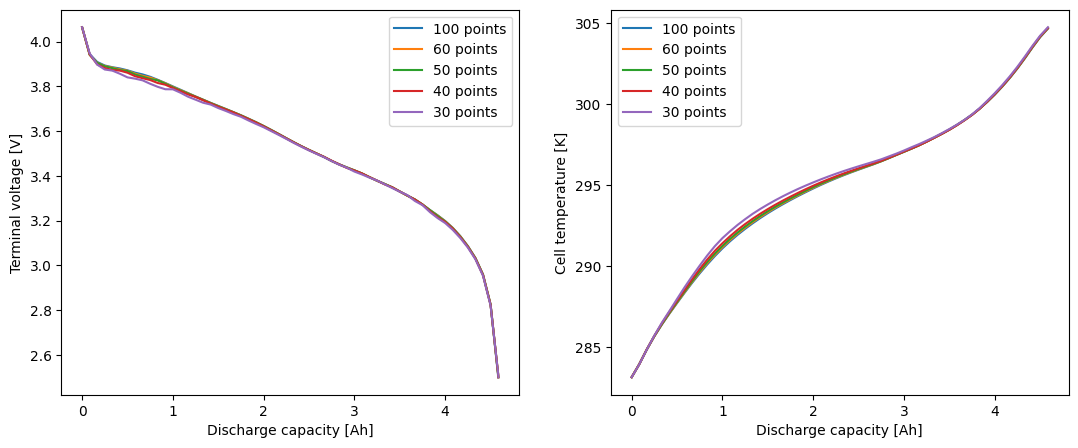

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))
ax1.plot(Q100,V100,label="100 points")
ax1.plot(Q60,V60,label="60 points")
ax1.plot(Q50,V50,label="50 points")
ax1.plot(Q40,V40,label="40 points")
ax1.plot(Q30,V30,label="30 points")
ax1.set_xlabel("Discharge capacity [Ah]")
ax1.set_ylabel("Terminal voltage [V]")
ax1.legend()
ax2.plot(Q100,T100,label="100 points")
ax2.plot(Q60,T60,label="60 points")
ax2.plot(Q50,T50,label="50 points")
ax2.plot(Q40,T40,label="40 points")
ax2.plot(Q30,T30,label="30 points")
ax2.set_xlabel("Discharge capacity [Ah]")
ax2.set_ylabel("Cell temperature [K]")
ax2.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/stress_induced_1C_discharge_283K.png")
plt.show()

In [ ]:
c100 = solution100["Negative electrolyte concentration [mol.m-3]"].entries[0,:]
c60 = solution60["Negative electrolyte concentration [mol.m-3]"].entries[0,:]
c50 = solution50["Negative electrolyte concentration [mol.m-3]"].entries[0,:]
c40 = solution40["Negative electrolyte concentration [mol.m-3]"].entries[0,:]
c30 = solution30["Negative electrolyte concentration [mol.m-3]"].entries[0,:]
plt.figure()
plt.plot(t100,c100,label="100 points")
plt.plot(t60,c60,label="60 points")
plt.plot(t50,c50,label="50 points")
plt.plot(t40,c40,label="40 points")
plt.plot(t30,c30,label="30 points")
plt.xlabel("Time [s]")
plt.ylabel("Electrolyte concentration at current collector [mol.dm-3]")
plt.legend()
plt.show()

In [ ]:
path = '/mnt/c/Users/sokane/pybamm_data/mesh_refinement/'
solution60.save(path+'uniform60_1C_discharge_283K.pkl')

In [ ]:
#t200_CV = solution200.cycles[2]["Time [s]"].entries
#t150_CV = solution150.cycles[2]["Time [s]"].entries
#t120_CV = solution120.cycles[2]["Time [s]"].entries
t100_CV = solution100.cycles[2]["Time [s]"].entries
t60_CV = solution60.cycles[2]["Time [s]"].entries
t30_CV = solution30.cycles[2]["Time [s]"].entries
#I200 = solution200.cycles[2]["Current [A]"].entries
#I150 = solution150.cycles[2]["Current [A]"].entries
#I120 = solution120.cycles[2]["Current [A]"].entries
I100 = solution100.cycles[2]["Current [A]"].entries
I60 = solution60.cycles[2]["Current [A]"].entries
I30 = solution30.cycles[2]["Current [A]"].entries
#Delta_t_CV_120 = t120_CV[-1]-t120_CV[0]
#Delta_t_CV_100 = t100_CV[-1]-t100_CV[0]
#print(f"For 120 points, CV phase lasts experiment ends at {Delta_t_CV_120} seconds.")
#print(f"For 100 points, CV phase lasts experiment ends at {Delta_t_CV_100} seconds.")

In [ ]:
fig, ax = plt.subplots()
#ax.plot(t200_CV,I200,label="200 points")
#ax.plot(t150_CV,I150,label="150 points")
#ax.plot(t120_CV,I120,label="120 points")
ax.plot(t100_CV,I100,label="100 points")
ax.plot(t60_CV,I60,label="60 points")
#ax.plot(t30_CV,I30,label="30 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")
ax.legend()
plt.show()